# Airlines Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Airlines Stock
symbols = ['AAL','ALK','DAL','LUV','JBLU']
start = '2019-12-01'
end = '2020-04-14'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

133

In [7]:
df.head()

,AAL,ALK,DAL,LUV,JBLU
Date,,,,,
2019-12-02,27.976612,67.725922,56.361004,56.319195,19.200001
2019-12-03,27.189522,66.234383,55.238750,55.534775,18.799999
2019-12-04,27.279188,66.542633,55.675735,55.385830,19.320000
2019-12-05,27.139706,66.910545,55.496971,55.137600,19.139999
2019-12-06,27.627901,67.934738,55.755184,55.544704,19.020000


In [8]:
df.tail()

,AAL,ALK,DAL,LUV,JBLU
Date,,,,,
2020-04-06,9.50,26.670000,22.320000,30.700001,7.73
2020-04-07,10.22,29.030001,22.250000,32.770000,8.76
2020-04-08,11.33,29.139999,23.230000,34.299999,9.03
2020-04-09,12.51,31.610001,24.389999,36.470001,9.50
2020-04-13,11.56,29.510000,23.250000,34.259998,9.03


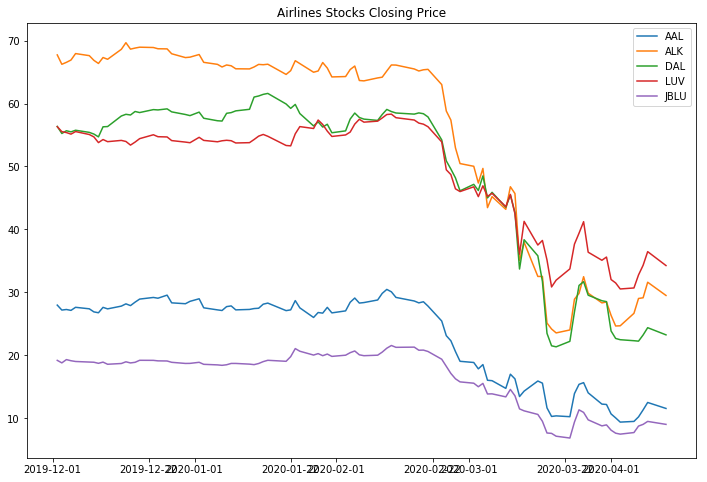

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Airlines Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

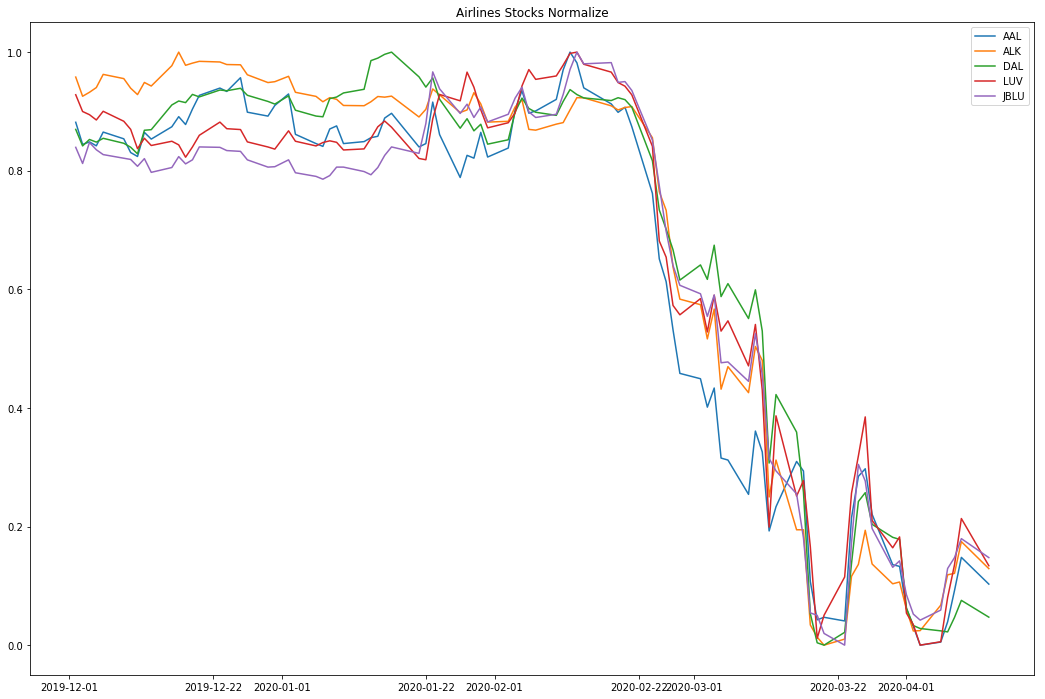

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Airlines Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

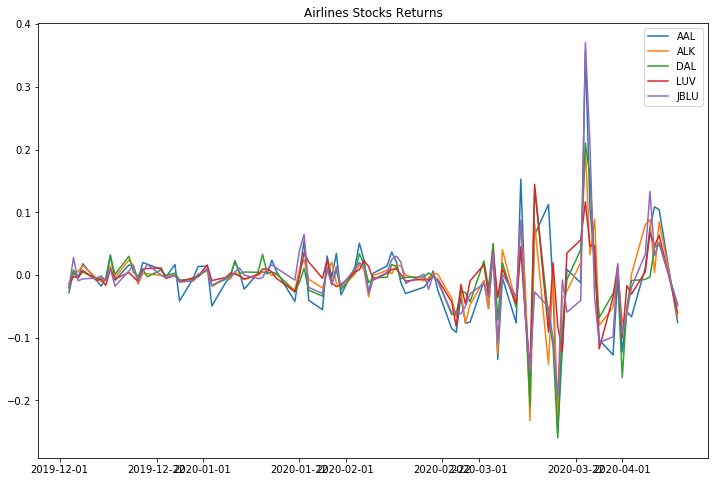

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Airlines Stocks Returns')
plt.legend(labels=stock_rets.columns)

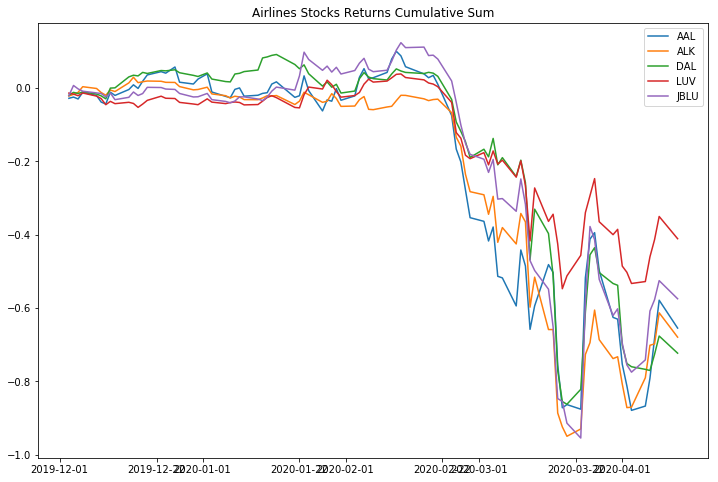

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Airlines Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

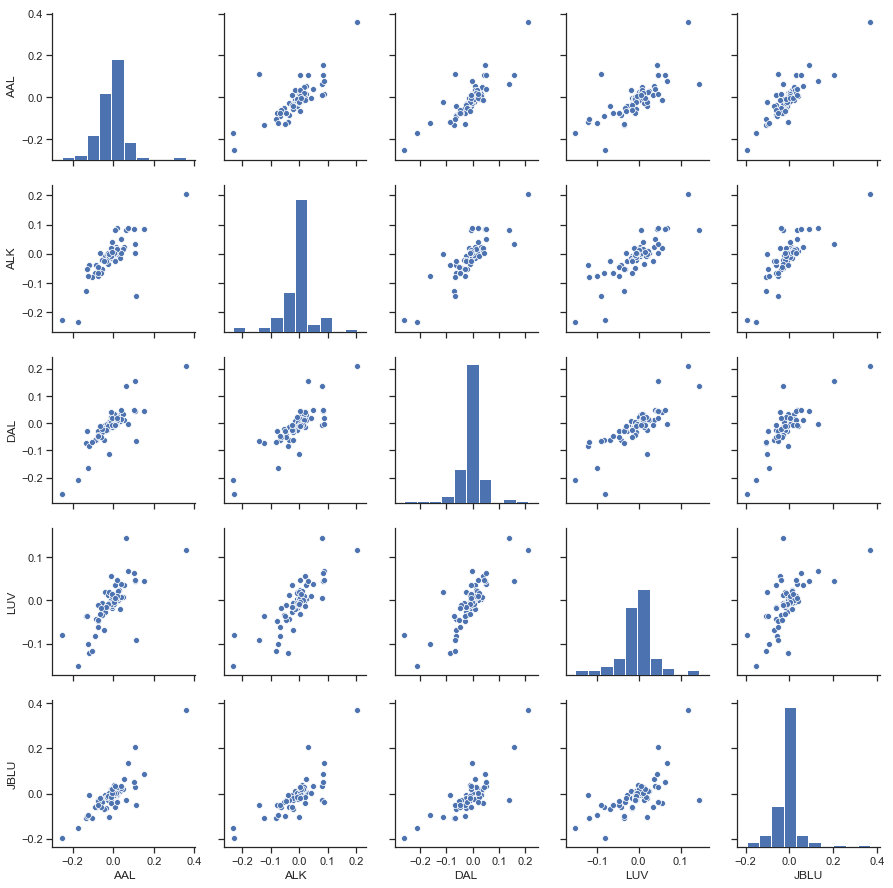

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

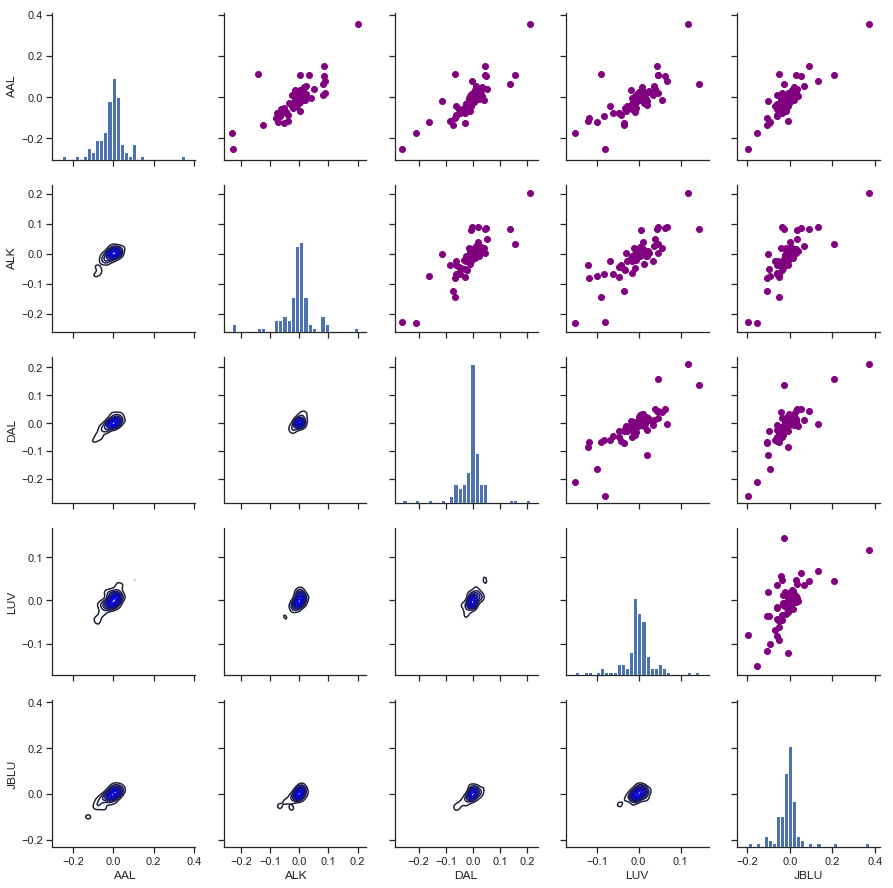

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

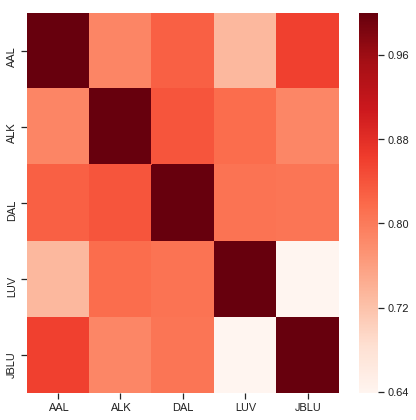

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

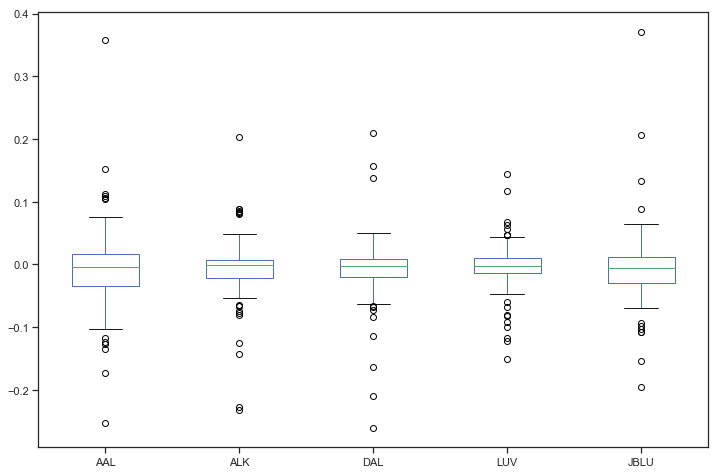

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

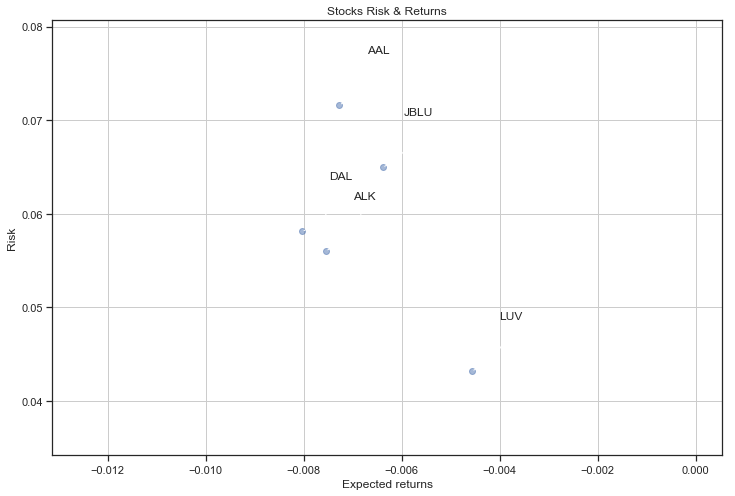

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

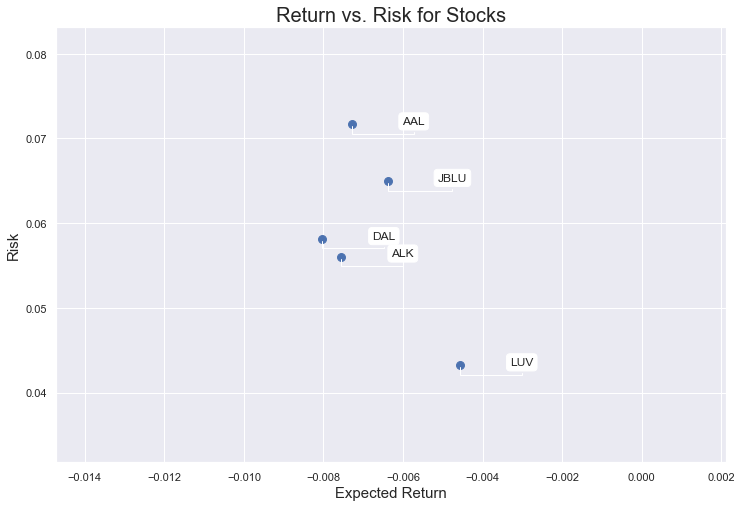

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

JBLU  JBLU    1.000000
LUV   LUV     1.000000
ALK   ALK     1.000000
DAL   DAL     1.000000
AAL   AAL     1.000000
      JBLU    0.859128
JBLU  AAL     0.859128
DAL   ALK     0.839744
ALK   DAL     0.839744
DAL   AAL     0.827899
AAL   DAL     0.827899
LUV   ALK     0.816276
ALK   LUV     0.816276
DAL   LUV     0.808675
LUV   DAL     0.808675
DAL   JBLU    0.807102
JBLU  DAL     0.807102
ALK   AAL     0.789153
AAL   ALK     0.789153
ALK   JBLU    0.787202
JBLU  ALK     0.787202
AAL   LUV     0.732962
LUV   AAL     0.732962
JBLU  LUV     0.638621
LUV   JBLU    0.638621
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AAL,ALK,DAL,LUV,JBLU
Date,,,,,
2019-12-03,0.367220,0.483075,0.510561,0.464128,0.308579
2019-12-04,0.418722,0.544336,0.569747,0.502181,0.394310
2019-12-05,0.404941,0.546345,0.546088,0.496091,0.328939
2019-12-06,0.442793,0.568799,0.562816,0.536239,0.334327
2019-12-09,0.399137,0.522557,0.540035,0.482827,0.337045


In [23]:
Normalized_Value.corr()

,AAL,ALK,DAL,LUV,JBLU
AAL,1.000000,0.789153,0.827899,0.732962,0.859128
ALK,0.789153,1.000000,0.839744,0.816276,0.787202
DAL,0.827899,0.839744,1.000000,0.808675,0.807102
LUV,0.732962,0.816276,0.808675,1.000000,0.638621
JBLU,0.859128,0.787202,0.807102,0.638621,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

JBLU  JBLU    1.000000
LUV   LUV     1.000000
ALK   ALK     1.000000
DAL   DAL     1.000000
AAL   AAL     1.000000
      JBLU    0.859128
JBLU  AAL     0.859128
DAL   ALK     0.839744
ALK   DAL     0.839744
DAL   AAL     0.827899
AAL   DAL     0.827899
LUV   ALK     0.816276
ALK   LUV     0.816276
DAL   LUV     0.808675
LUV   DAL     0.808675
DAL   JBLU    0.807102
JBLU  DAL     0.807102
ALK   AAL     0.789153
AAL   ALK     0.789153
ALK   JBLU    0.787202
JBLU  ALK     0.787202
AAL   LUV     0.732962
LUV   AAL     0.732962
JBLU  LUV     0.638621
LUV   JBLU    0.638621
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAL    -0.007272
ALK    -0.007548
DAL    -0.008032
LUV    -0.004565
JBLU   -0.006384
dtype: float64
--------------------------------------------------
Stock risks:
AAL     0.071660
ALK     0.056064
DAL     0.058122
LUV     0.043218
JBLU    0.064988
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
DAL,-0.008032,0.058122
ALK,-0.007548,0.056064
AAL,-0.007272,0.071660
JBLU,-0.006384,0.064988
LUV,-0.004565,0.043218


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
LUV,-0.004565,0.043218
ALK,-0.007548,0.056064
DAL,-0.008032,0.058122
JBLU,-0.006384,0.064988
AAL,-0.007272,0.071660


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AAL,-0.007272,0.071660,-0.241029
ALK,-0.007548,0.056064,-0.312989
DAL,-0.008032,0.058122,-0.310245
LUV,-0.004565,0.043218,-0.337021
JBLU,-0.006384,0.064988,-0.252114


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AAL,-0.007272,0.071660,-0.241029,0.358049,-0.252246,-0.004230,-7.593923
ALK,-0.007548,0.056064,-0.312989,0.203079,-0.232385,-0.000512,-6.643468
DAL,-0.008032,0.058122,-0.310245,0.210171,-0.259924,-0.003102,-4.674044
LUV,-0.004565,0.043218,-0.337021,0.144441,-0.151094,-0.002829,-6.059783
JBLU,-0.006384,0.064988,-0.252114,0.370262,-0.195378,-0.005363,-4.947371


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
AAL,-0.007272,0.071660,-0.241029,0.358049,-0.252246,-0.004230,-7.593923,-0.000594
ALK,-0.007548,0.056064,-0.312989,0.203079,-0.232385,-0.000512,-6.643468,-0.000517
DAL,-0.008032,0.058122,-0.310245,0.210171,-0.259924,-0.003102,-4.674044,-0.000360
LUV,-0.004565,0.043218,-0.337021,0.144441,-0.151094,-0.002829,-6.059783,-0.000470
JBLU,-0.006384,0.064988,-0.252114,0.370262,-0.195378,-0.005363,-4.947371,-0.000381


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AAL,-0.007272,0.071660,-0.241029,0.358049,-0.252246,-0.004230,-7.593923,-0.000594,-0.812617
ALK,-0.007548,0.056064,-0.312989,0.203079,-0.232385,-0.000512,-6.643468,-0.000517,-0.792792
DAL,-0.008032,0.058122,-0.310245,0.210171,-0.259924,-0.003102,-4.674044,-0.000360,-0.813204
LUV,-0.004565,0.043218,-0.337021,0.144441,-0.151094,-0.002829,-6.059783,-0.000470,-0.610072
JBLU,-0.006384,0.064988,-0.252114,0.370262,-0.195378,-0.005363,-4.947371,-0.000381,-0.760526


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AAL,-0.007272,0.071660,-0.241029,0.358049,-0.252246,-0.004230,-7.593923,-0.000594,-0.812617
ALK,-0.007548,0.056064,-0.312989,0.203079,-0.232385,-0.000512,-6.643468,-0.000517,-0.792792
LUV,-0.004565,0.043218,-0.337021,0.144441,-0.151094,-0.002829,-6.059783,-0.000470,-0.610072
JBLU,-0.006384,0.064988,-0.252114,0.370262,-0.195378,-0.005363,-4.947371,-0.000381,-0.760526
DAL,-0.008032,0.058122,-0.310245,0.210171,-0.259924,-0.003102,-4.674044,-0.000360,-0.813204
